In [14]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
# Check if GPU is available
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
train_df = pd.read_csv('mitbih_train.csv',header=None)
test_df = pd.read_csv('mitbih_test.csv',header=None)

In [16]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [17]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


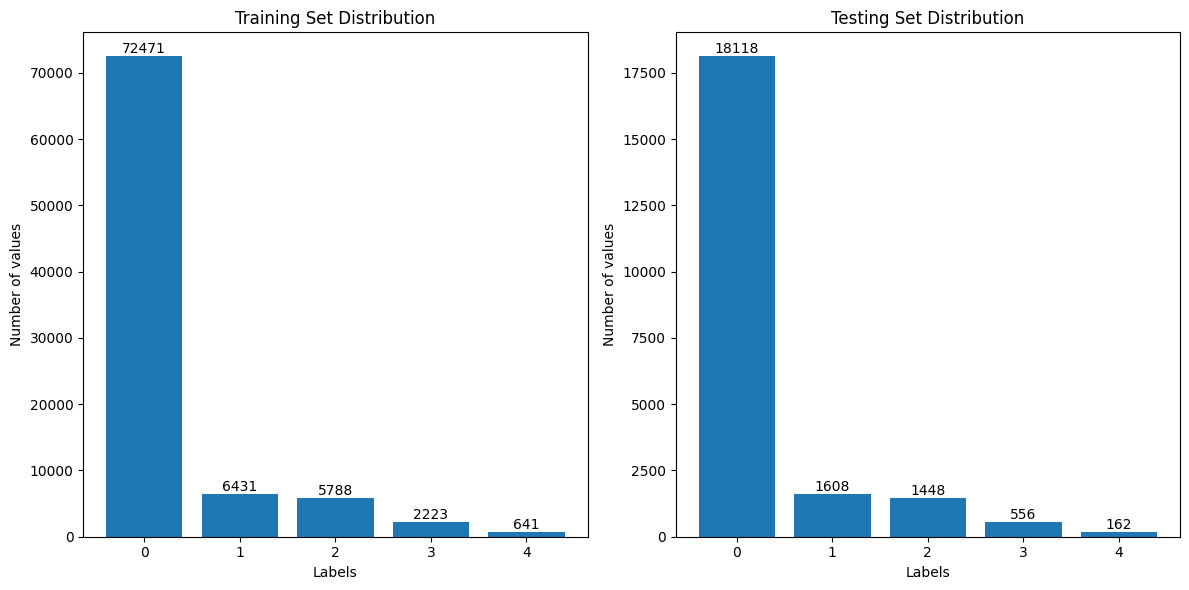

In [18]:
plt.figure(figsize=(12, 6))

# First subplot for training set
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
bars_train = plt.bar(train_df[train_df.columns[-1]].unique(), train_df[train_df.columns[-1]].value_counts())
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Training Set Distribution")
for bar in bars_train:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

# Second subplot for testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
bars_test = plt.bar(test_df[test_df.columns[-1]].unique(), test_df[test_df.columns[-1]].value_counts())
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Testing Set Distribution")
for bar in bars_test:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()

In [19]:
X_train = train_df.drop(train_df.columns[-1], axis=1)
y_train = train_df[train_df.columns[-1]] 
X_test = test_df.drop(test_df.columns[-1], axis=1)
y_test = test_df[test_df.columns[-1]] 

In [20]:
# Labeling data
encoder = LabelEncoder()
encoder.fit_transform(y_train)
encoder.transform(y_test)

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [21]:
# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [22]:
print(X_train_resample.shape, y_train_resample.shape)
print(X_test.shape, y_test.shape)

(362355, 187) (362355,)
(21892, 187) (21892,)


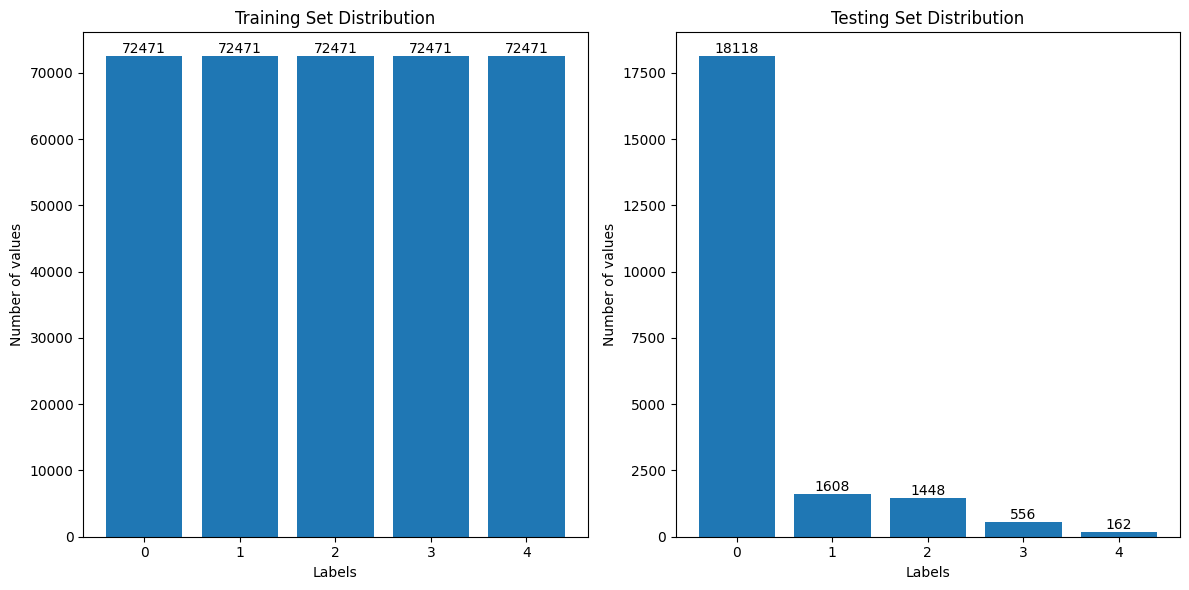

In [29]:
# After SMOTE resampling
plt.figure(figsize=(12, 6))

# First subplot for training set
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
bars_train = plt.bar(y_train_resample.unique(), y_train_resample.value_counts())
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Training Set Distribution")
for bar in bars_train:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

# Second subplot for testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
bars_test = plt.bar(y_test.unique(), y_test.value_counts())
plt.xlabel("Labels")
plt.ylabel("Number of values")
plt.title("Testing Set Distribution")
for bar in bars_test:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()  # Adjust layout to avoid overlapping elements
plt.show()

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(random_state=42)

In [25]:
def evaluate_model(y_true, y_pred, class_names=None):
    # Print metrics
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    
    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [27]:
y_pred = rf.predict(X_test)

Accuracy: 0.980586515622145
Precision: 0.9800681449844614
Recall: 0.980586515622145
F1 Score: 0.9801673562214609

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.88      0.76      0.81       556
         2.0       0.97      0.93      0.95      1448
         3.0       0.81      0.73      0.77       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.88      0.90     21892
weighted avg       0.98      0.98      0.98     21892



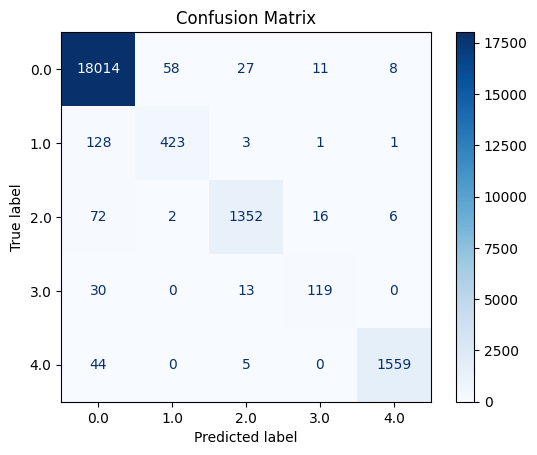

In [28]:
evaluate_model(y_test, y_pred, class_names=encoder.classes_)
